In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('data/dataset1.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (5000, 6)

First few rows:
        Fever  Headache     Cough   Fatigue  Body_Pain      Disease
0   98.283156  4.118632  2.687983  4.116661   8.470956    Body Ache
1   98.284660  6.963971  1.960734  5.495257   8.033919    Body Ache
2  103.622552  8.702915  2.854463  6.546993   2.205383      Malaria
3   98.254732  1.354851  5.880676  5.418289   2.695560  Common Cold
4   97.182670  0.357962  6.206723  4.488365   1.406323        Cough

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fever      5000 non-null   float64
 1   Headache   5000 non-null   float64
 2   Cough      5000 non-null   float64
 3   Fatigue    5000 non-null   float64
 4   Body_Pain  5000 non-null   float64
 5   Disease    5000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 234.5+ KB
None

Missing values:
Fever        0
Headache     0
Cou

In [3]:
# Check the distribution of diseases
print("Disease distribution:")
disease_counts = df['Disease'].value_counts()
print(disease_counts)

# Statistical summary of numerical features
print("\nStatistical summary:")
print(df.describe())

# Calculate percentage distribution
print("\nDisease percentage distribution:")
disease_percentages = (disease_counts / len(df)) * 100
print(disease_percentages.round(2))

Disease distribution:
Disease
Body Ache       625
Malaria         625
Common Cold     625
Cough           625
Normal Fever    625
Dengue          625
Asthma          625
Runny Nose      625
Name: count, dtype: int64

Statistical summary:
             Fever     Headache        Cough      Fatigue    Body_Pain
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean     99.815773     4.038019     3.184541     5.057598     2.618122
std       2.207827     2.524027     2.687626     2.221226     2.500070
min      97.000135     0.000350     0.000596     1.000764     0.000398
25%      98.130796     2.074333     1.035448     3.385986     0.835067
50%      98.997734     3.523913     2.217365     4.601064     1.618207
75%     101.574381     5.996876     5.411676     6.445042     3.992620
max     104.998997     9.993755     9.999074     9.999080     9.998490

Disease percentage distribution:
Disease
Body Ache       12.5
Malaria         12.5
Common Cold     12.5
Cough           12

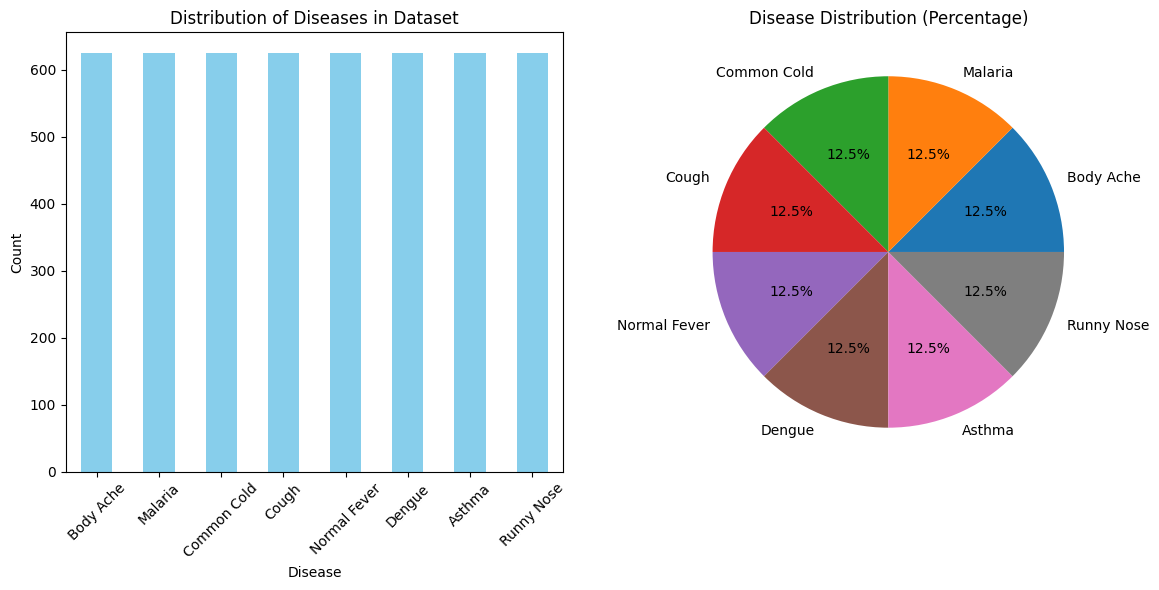

In [4]:
# Visualize disease distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Disease'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Diseases in Dataset')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['Disease'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Disease Distribution (Percentage)')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [5]:
# Separate features and target variable
X = df[['Fever', 'Headache', 'Cough', 'Fatigue', 'Body_Pain']]
y = df['Disease']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature names:", list(X.columns))
print("Unique diseases:", list(y.unique()))
print("Number of classes:", len(y.unique()))

Features shape: (5000, 5)
Target shape: (5000,)

Feature names: ['Fever', 'Headache', 'Cough', 'Fatigue', 'Body_Pain']
Unique diseases: ['Body Ache', 'Malaria', 'Common Cold', 'Cough', 'Normal Fever', 'Dengue', 'Asthma', 'Runny Nose']
Number of classes: 8


In [7]:
# Split the data with a smaller test set (10% for testing, 90% for training)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print(f"Training percentage: {(X_train.shape[0]/len(df))*100:.1f}%")
print(f"Testing percentage: {(X_test.shape[0]/len(df))*100:.1f}%")

print("\nTraining set disease distribution:")
train_dist = y_train.value_counts().sort_index()
print(train_dist)

print("\nTesting set disease distribution:")
test_dist = y_test.value_counts().sort_index()
print(test_dist)

Training set size: 4500
Testing set size: 500
Training percentage: 90.0%
Testing percentage: 10.0%

Training set disease distribution:
Disease
Asthma          563
Body Ache       563
Common Cold     562
Cough           562
Dengue          562
Malaria         563
Normal Fever    562
Runny Nose      563
Name: count, dtype: int64

Testing set disease distribution:
Disease
Asthma          62
Body Ache       62
Common Cold     63
Cough           63
Dengue          63
Malaria         62
Normal Fever    63
Runny Nose      62
Name: count, dtype: int64


In [8]:
# Create and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Calculate training accuracy
y_train_pred = nb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Model trained successfully!")
print("Number of classes:", len(nb_model.classes_))
print("Classes:", nb_model.classes_)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Training Accuracy Percentage: {train_accuracy * 100:.2f}%")

Model trained successfully!
Number of classes: 8
Classes: ['Asthma' 'Body Ache' 'Common Cold' 'Cough' 'Dengue' 'Malaria'
 'Normal Fever' 'Runny Nose']

Training Accuracy: 0.8996
Training Accuracy Percentage: 89.96%


In [9]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

print("=== MODEL PERFORMANCE ===")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy * 100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy * 100:.2f}%)")
print(f"Accuracy Difference: {abs(train_accuracy - test_accuracy):.4f}")

# Check for overfitting
if train_accuracy - test_accuracy > 0.05:
    print("⚠️  Potential overfitting detected!")
elif test_accuracy > train_accuracy:
    print("✅ Good generalization - test accuracy higher than training!")
else:
    print("✅ Good model performance!")

=== MODEL PERFORMANCE ===
Training Accuracy: 0.8996 (89.96%)
Test Accuracy: 0.8920 (89.20%)
Accuracy Difference: 0.0076
✅ Good model performance!


In [10]:
# Generate detailed classification report
print("\n=== DETAILED CLASSIFICATION REPORT ===")
class_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Extract and display key metrics
print("\n=== PER-CLASS ACCURACY ===")
for disease in nb_model.classes_:
    if disease in class_report:
        precision = class_report[disease]['precision']
        recall = class_report[disease]['recall']
        f1 = class_report[disease]['f1-score']
        support = class_report[disease]['support']
        print(f"{disease:15}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Support={support}")


=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

      Asthma       0.61      0.68      0.64        62
   Body Ache       1.00      1.00      1.00        62
 Common Cold       0.86      0.79      0.83        63
       Cough       0.75      0.71      0.73        63
      Dengue       0.98      1.00      0.99        63
     Malaria       1.00      0.98      0.99        62
Normal Fever       0.98      0.97      0.98        63
  Runny Nose       0.97      1.00      0.98        62

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500


=== PER-CLASS ACCURACY ===
Asthma         : Precision=0.609, Recall=0.677, F1=0.641, Support=62.0
Body Ache      : Precision=1.000, Recall=1.000, F1=1.000, Support=62.0
Common Cold    : Precision=0.862, Recall=0.794, F1=0.826, Support=63.0
Cough          : Precision=0.750, Recall=0.714, F1=0.732, Support=63

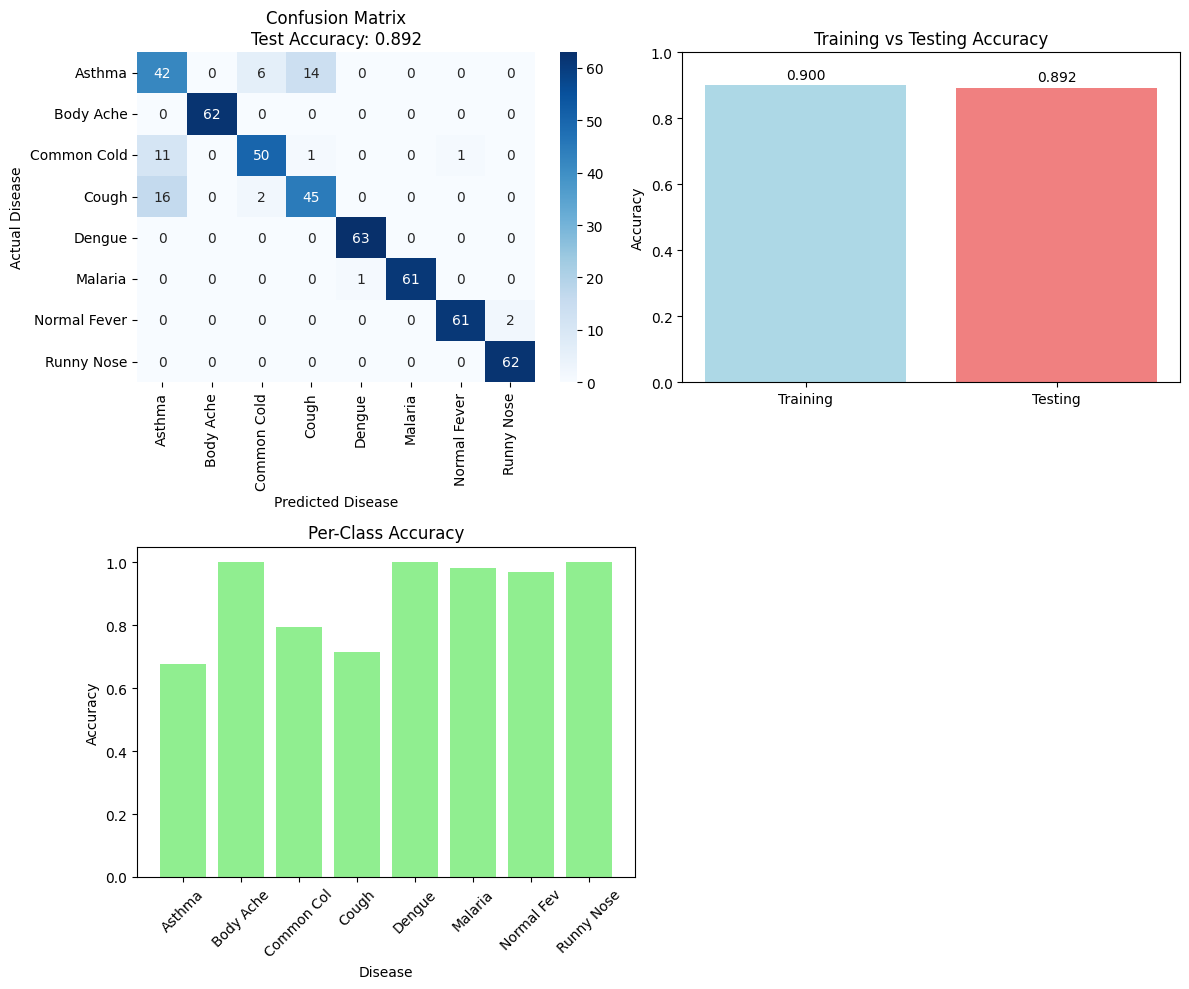


=== CONFUSION MATRIX (Numbers) ===
Rows: Actual, Columns: Predicted
              Asthma  Body Ache  Common Cold  Cough  Dengue  Malaria  \
Asthma            42          0            6     14       0        0   
Body Ache          0         62            0      0       0        0   
Common Cold       11          0           50      1       0        0   
Cough             16          0            2     45       0        0   
Dengue             0          0            0      0      63        0   
Malaria            0          0            0      0       1       61   
Normal Fever       0          0            0      0       0        0   
Runny Nose         0          0            0      0       0        0   

              Normal Fever  Runny Nose  
Asthma                   0           0  
Body Ache                0           0  
Common Cold              1           0  
Cough                    0           0  
Dengue                   0           0  
Malaria                  0          

In [11]:
# Create and visualize confusion matrix with accuracy calculations
plt.figure(figsize=(12, 10))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.subplot(2, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=nb_model.classes_, 
            yticklabels=nb_model.classes_)
plt.title(f'Confusion Matrix\nTest Accuracy: {test_accuracy:.3f}')
plt.xlabel('Predicted Disease')
plt.ylabel('Actual Disease')

# Accuracy comparison
plt.subplot(2, 2, 2)
accuracies = [train_accuracy, test_accuracy]
labels = ['Training', 'Testing']
colors = ['lightblue', 'lightcoral']
bars = plt.bar(labels, accuracies, color=colors)
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

# Per-class accuracy
plt.subplot(2, 2, 3)
class_accuracies = []
class_names = []
for i, disease in enumerate(nb_model.classes_):
    if i < len(cm):
        class_acc = cm[i, i] / cm[i, :].sum() if cm[i, :].sum() > 0 else 0
        class_accuracies.append(class_acc)
        class_names.append(disease[:10])  # Truncate long names

plt.bar(range(len(class_accuracies)), class_accuracies, color='lightgreen')
plt.title('Per-Class Accuracy')
plt.xlabel('Disease')
plt.ylabel('Accuracy')
plt.xticks(range(len(class_names)), class_names, rotation=45)

plt.tight_layout()
plt.show()

# Print numerical confusion matrix
print("\n=== CONFUSION MATRIX (Numbers) ===")
print("Rows: Actual, Columns: Predicted")
cm_df = pd.DataFrame(cm, index=nb_model.classes_, columns=nb_model.classes_)
print(cm_df)

In [12]:
# Example predictions with sample data and detailed analysis
print("\n=== SAMPLE PREDICTIONS ===")
sample_data = [
    [102.5, 7.5, 3.2, 6.8, 4.1],  # High fever, moderate headache
    [98.6, 2.1, 8.5, 3.2, 1.8],   # Normal fever, high cough
    [104.2, 8.9, 1.2, 8.5, 7.6],  # High fever, high headache and fatigue
    [99.1, 1.0, 9.0, 2.0, 1.5],   # Normal fever, very high cough
    [103.8, 6.0, 2.0, 7.0, 8.0]   # High fever, high fatigue and body pain
]

feature_names = ['Fever', 'Headache', 'Cough', 'Fatigue', 'Body_Pain']

for i, sample in enumerate(sample_data):
    prediction = nb_model.predict([sample])
    probabilities = nb_model.predict_proba([sample])[0]
    max_prob = np.max(probabilities)
    
    print(f"\nSample {i+1}:")
    print(f"Symptoms: {dict(zip(feature_names, sample))}")
    print(f"Predicted Disease: {prediction[0]}")
    print(f"Confidence: {max_prob:.4f} ({max_prob*100:.2f}%)")
    
    # Show top 3 predictions
    top_3_indices = np.argsort(probabilities)[-3:][::-1]
    print("Top 3 predictions:")
    for j, idx in enumerate(top_3_indices):
        disease = nb_model.classes_[idx]
        prob = probabilities[idx]
        print(f"  {j+1}. {disease}: {prob:.4f} ({prob*100:.2f}%)")


=== SAMPLE PREDICTIONS ===

Sample 1:
Symptoms: {'Fever': 102.5, 'Headache': 7.5, 'Cough': 3.2, 'Fatigue': 6.8, 'Body_Pain': 4.1}
Predicted Disease: Malaria
Confidence: 0.7865 (78.65%)
Top 3 predictions:
  1. Malaria: 0.7865 (78.65%)
  2. Dengue: 0.2135 (21.35%)
  3. Common Cold: 0.0000 (0.00%)

Sample 2:
Symptoms: {'Fever': 98.6, 'Headache': 2.1, 'Cough': 8.5, 'Fatigue': 3.2, 'Body_Pain': 1.8}
Predicted Disease: Cough
Confidence: 0.7573 (75.73%)
Top 3 predictions:
  1. Cough: 0.7573 (75.73%)
  2. Asthma: 0.1642 (16.42%)
  3. Common Cold: 0.0786 (7.86%)

Sample 3:
Symptoms: {'Fever': 104.2, 'Headache': 8.9, 'Cough': 1.2, 'Fatigue': 8.5, 'Body_Pain': 7.6}
Predicted Disease: Dengue
Confidence: 1.0000 (100.00%)
Top 3 predictions:
  1. Dengue: 1.0000 (100.00%)
  2. Malaria: 0.0000 (0.00%)
  3. Body Ache: 0.0000 (0.00%)

Sample 4:
Symptoms: {'Fever': 99.1, 'Headache': 1.0, 'Cough': 9.0, 'Fatigue': 2.0, 'Body_Pain': 1.5}
Predicted Disease: Cough
Confidence: 0.7813 (78.13%)
Top 3 predictions

d:\main_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
d:\main_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
d:\main_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
d:\main_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
d:\main_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
d:\main_project\.venv\Lib\site-packages\sklearn\utils\validation.py:27